# **About the Project**
In this project, the main objective is to classify the images correctly into 6 categories using Convolutional Neural Network and then perform Transfer Learning for better performance of the model trained from scratch.

# **Convolutional Neural Network**
The convolutional neural network (CNN) is a class of deep learning neural networks. CNNs represent a huge breakthrough in image recognition. They’re most commonly used to analyze visual imagery and are frequently working behind the scenes in image classification. Convolutional Neural Networks (CNNs) are the backbone of image classification, a deep learning phenomenon that takes an image and assigns it a class and a label that makes it unique.

CNN’s are equipped with an input layer, an output layer, and hidden layers, all of which help process and classify images. The hidden layers comprise convolutional layers, ReLU layers, pooling layers, and fully connected layers, all of which play a crucial role.

# **Multiclass image classification**
Image classification is the process of taking an input (like a picture) and outputting a class (like “cat”) or a probability that the input is a particular class (“there’s a 90% probability that this input is a cat”). In general, Image Classification is defined as the task in which we give an image as the input to a model built using a specific algorithm that outputs the class or the probability of the class that the image belongs to. This process in which we label an image to a particular class is called Supervised Learning. Multiclass classification is a more general form of classifying training samples in categories. 

Multi-class classification refers to those classification tasks in computer vision, that have more than two class labels. In order to classify a set of data into different classes or categories, the relationship between the data and the classes into which they are classified must be well understood.



# About the Dataset

The dataset used for this project is the Intel Image Classification downloaded from Kaggle. 

In this dataset, we are provided with 25k+ images from a wide range of natural scenes from all around the world. Each image has only one natural scene category and are saved in separate folder as of the labelled class. Each image have been rated for the category on a scale of 0 to 5:

These images are of size 150x150 distributed under 6 categories as:

{'buildings' -> 0,       buildings- images

'forest' -> 1,           forest- images

'glacier' -> 2,          glacier- images

'mountain' -> 3,         mountain- images

'sea' -> 4,              sea- images

'street' -> 5 }          street- images

It contains three folders namely train, test, and pred. Each of training and testing folders have 6 files 
each with the specified categories of natural scenes containing the images for training and testing. 

There are around 14k+ images in Train, 3k in Test and 7k+ images in Prediction data folder.

The model would get trained using the images in the train folder by extracting all the features required 
to classify an image correctly into its correct category using the train data generator function from the 
ImageDataGenerator algorithm. Using the images present in the test folder and the validation data 
generator function from the ImageDataGenerator algorithm, the model would evaluate its performance 
on the basis of training accuracy, training loss, testing accuracy and testing loss. Finally using the images 
present in the prediction folder which is an unseen data to the trained model, we would be able to test 
the model whether its predictions are correct or not.

For obtaining training and validation data, images were roughly divided into two parts as 70:30 ratio for training & validation respectively

# **Importing the required Libraries/Packages**

In [70]:
import os  #For accessing directory structure and interacting with the operating system
from tqdm import tqdm   #For outputting a progress bar 
import cv2  #For computer vision related problems
import numpy as np    #for linear algebra
import pandas as pd  #For data manipulation and analysis
import matplotlib.pyplot as plt    #For data visualization
import matplotlib.image as mpimg
%matplotlib inline
from glob import glob  #Returns file paths
import pathlib  #For file paths related tasks depending on the operating system 
import PIL  #Supports many image file formats for opening/manipulating/saving
from PIL import Image
import random   #Generates pseudo random-variables

import IPython  #A Jupyter kernel to work with Python code in Jupyter notebooks and other interactive frontends
from IPython.display import display

import tensorflow as tf   #For creating Machine Learning applications
import keras  #Provides a python interface for artificial neural networks and allows to work for deep learning
from keras.preprocessing import image
from keras.preprocessing.image import load_img #Loads an image in PIL format
from keras.preprocessing.image import ImageDataGenerator #For creating modified versions of the image(Image data augmentation can be done using the ImageDataGenerator)
from keras.preprocessing.image import array_to_img, img_to_array 

from tensorflow.keras.utils import to_categorical

#For building and compiling the model
from keras import models
from keras import layers
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation,  Flatten, Dense, Dropout  
from keras import optimizers
from keras import losses
from keras import metrics
#from sklearn.model_selection import train_test_split

print('Imported all the libraries!!')

Imported all the libraries!!


# **Exploratory Data Analysis (EDA)**
Exploring and visualizing the image data present in the training dataset

In [2]:
#Setting the Image dimensions and batch_size 
img_height=150
img_width=150
batch_size=32

#Setting the source folder for loading the data and storing the path of data into the variables
train_data_dir=r"C:\Users\ISHITAA\Dataset\seg_train\seg_train"  #Location of training images
test_data_dir=r"C:\Users\ISHITAA\Dataset\seg_test\seg_test"     #Location of testing images
val_data_dir=r"C:\Users\ISHITAA\Dataset\seg_test\seg_test"     #Location of testing images
pred_data_dir=r"C:\Users\ISHITAA\Dataset\seg_pred\seg_pred"    #Location of prediction images

In [3]:
#Defining the class names and their labels
class_names = [ 'buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']   #Creating a dictionary of class names according to the label
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
class_names_label

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [4]:
#Loading the data
def load_data():
    """
        Loading the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = [r'C:\Users\ISHITAA\Dataset\seg_train\seg_train', r'C:\Users\ISHITAA\Dataset\seg_test\seg_test']
    output = []
    
    # Iterating through training and test sets one by one
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading: {}".format(dataset))  #One by one through both the datasets...The format method gives the formatted string as specified by the argument of format placed at the curly braces
        
        # Iterating through each folder corresponding to a category
        for folder in os.listdir(dataset):   #From the list of all files in the specified dataste directory get the labels from the folder and keep on iterating
            label = class_names_label[folder] #class_names_labels is the dictionary whose key:value pairs are classes:numbers representing them
            
            # Iterating through the images in each folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))): #Tqdm is a Python library used to display smart progress bars that show the progress of your Python code execution. 
                
                # Getting the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Opening and resizing the images
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  #BGR is converted to RGB
                image = cv2.resize(image, (img_height,img_width)) 
                
                # Appending the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')  #Converting list of images to numpy array
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))
        
    return output

In [5]:
#Splitting the data into train and test set
(train_images, train_labels), (test_images, test_labels) = load_data()  #(X_train,y_train), (X_test,y_test)

  5%|███▉                                                                          | 109/2191 [00:00<00:03, 562.09it/s]

Loading: C:\Users\ISHITAA\Dataset\seg_train\seg_train


  5%|███▊                                                                            | 21/437 [00:00<00:01, 209.11it/s]

Loading: C:\Users\ISHITAA\Dataset\seg_test\seg_test


100%|███████████████████████████████████████████████████████████████████████████████| 501/501 [00:00<00:00, 649.16it/s]


In [6]:
print('The shape of training data is: ', train_images.shape)  #X_train ....(No. of training images, img_height, img_width, img_channels)

The shape of training data is:  (14034, 150, 150, 3)


In [7]:
print('The number of training images are: ', train_images.shape[0])

The number of training images are:  14034


In [8]:
print('The shape of testing data is: ', test_images.shape)     #X_test ....(No. of testing images, img_height, img_width, img_channels)

The shape of testing data is:  (3000, 150, 150, 3)


In [9]:
print('The number of testing images are: ', test_images.shape[0])


The number of testing images are:  3000


In [10]:
print(train_labels.shape)
print(test_labels.shape)

(14034,)
(3000,)


In [11]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training images: {}".format(n_train))
print ("Number of testing images: {}".format(n_test))
print ("Size of each image is: {}".format(img_height,img_width))

Number of training images: 14034
Number of testing images: 3000
Size of each image is: 150


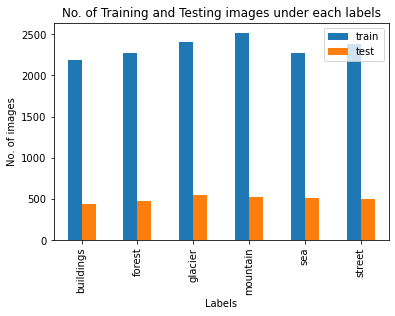

In [12]:
#Visualizing the data with bargraph

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
              'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.xlabel("Labels")
plt.ylabel("No. of images")
plt.title("No. of Training and Testing images under each labels")
plt.show()

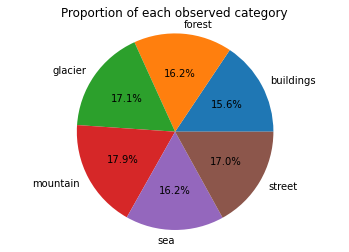

In [13]:
#Visualizing the data with piechart

plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [14]:
train_images  #Gives an nd array

array([[[[247., 247., 245.],
         [247., 247., 245.],
         [248., 248., 246.],
         ...,
         [248., 248., 248.],
         [247., 247., 245.],
         [247., 247., 245.]],

        [[246., 246., 244.],
         [247., 247., 245.],
         [247., 247., 245.],
         ...,
         [248., 248., 248.],
         [247., 247., 245.],
         [247., 247., 245.]],

        [[246., 246., 244.],
         [246., 246., 244.],
         [247., 247., 245.],
         ...,
         [248., 248., 248.],
         [247., 247., 245.],
         [247., 247., 245.]],

        ...,

        [[ 47.,  46.,  44.],
         [ 62.,  61.,  59.],
         [ 49.,  48.,  46.],
         ...,
         [ 51.,  46.,  43.],
         [ 45.,  40.,  37.],
         [ 94.,  89.,  86.]],

        [[ 77.,  76.,  74.],
         [ 47.,  46.,  44.],
         [ 43.,  42.,  40.],
         ...,
         [ 22.,  17.,  14.],
         [ 55.,  50.,  47.],
         [ 39.,  34.,  31.]],

        [[ 59.,  58.,  56.],
       

In [15]:
#Resizing the images 
#The original images consist in RGB coefficients in the range 0-255
#But such values would be too high for the models to process
#So I target the values between 0 and 1 instead by scaling with a 1./255 factor
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [16]:
#Accessing the folder paths in each train and test folders
train_folders=glob(r'C:\Users\ISHITAA\Dataset\seg_train\seg_train\*')
print('No. of training folders:', len(train_folders))
print('Paths of the training folders:\n',train_folders[:6])
print('\n')

test_folders=glob(r'C:\Users\ISHITAA\Dataset\seg_test\seg_test\*')
print('No. of testing folders:', len(test_folders))
print('Paths of the testing folders:\n',test_folders[:6])

No. of training folders: 6
Paths of the training folders:
 ['C:\\Users\\ISHITAA\\Dataset\\seg_train\\seg_train\\buildings', 'C:\\Users\\ISHITAA\\Dataset\\seg_train\\seg_train\\forest', 'C:\\Users\\ISHITAA\\Dataset\\seg_train\\seg_train\\glacier', 'C:\\Users\\ISHITAA\\Dataset\\seg_train\\seg_train\\mountain', 'C:\\Users\\ISHITAA\\Dataset\\seg_train\\seg_train\\sea', 'C:\\Users\\ISHITAA\\Dataset\\seg_train\\seg_train\\street']


No. of testing folders: 6
Paths of the testing folders:
 ['C:\\Users\\ISHITAA\\Dataset\\seg_test\\seg_test\\buildings', 'C:\\Users\\ISHITAA\\Dataset\\seg_test\\seg_test\\forest', 'C:\\Users\\ISHITAA\\Dataset\\seg_test\\seg_test\\glacier', 'C:\\Users\\ISHITAA\\Dataset\\seg_test\\seg_test\\mountain', 'C:\\Users\\ISHITAA\\Dataset\\seg_test\\seg_test\\sea', 'C:\\Users\\ISHITAA\\Dataset\\seg_test\\seg_test\\street']


In [17]:
#Exploring the images 
train=os.listdir(r"C:\Users\ISHITAA\Dataset\seg_train\seg_train") #returns the list of all files in the current working directory.
test=os.listdir(r"C:\Users\ISHITAA\Dataset\seg_test\seg_test")
print(f"No. of Training files: {len(train)} {train[:6]}")
print(f"No. of Testing files: {len(test)} {test[:6]}")

No. of Training files: 6 ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
No. of Testing files: 6 ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [18]:
#Loading the training dataset
import pathlib
data_dir=pathlib.Path(r'C:\Users\ISHITAA\Dataset\seg_train\seg_train')
data_dir    #String path is converted into the windows path

WindowsPath('C:/Users/ISHITAA/Dataset/seg_train/seg_train')

In [19]:
train_dataset=tf.keras.preprocessing.image_dataset_from_directory(data_dir, batch_size=32)

Found 14034 files belonging to 6 classes.


In [20]:
train_image_count = len(list(data_dir.glob('*/*.jpg')))  #Counts the number of images with jpg extension in the list of the given directory of the training dataset
print('The number of training images are: ', train_image_count)

The number of training images are:  14034


In [21]:
mountains = list((data_dir.glob('mountain/*.jpg')))  #Gives the list of windows path files of the images inside the mountain folder under the training dataset
mountains        #asterik means get me all the files

[WindowsPath('C:/Users/ISHITAA/Dataset/seg_train/seg_train/mountain/10000.jpg'),
 WindowsPath('C:/Users/ISHITAA/Dataset/seg_train/seg_train/mountain/10001.jpg'),
 WindowsPath('C:/Users/ISHITAA/Dataset/seg_train/seg_train/mountain/10002.jpg'),
 WindowsPath('C:/Users/ISHITAA/Dataset/seg_train/seg_train/mountain/10008.jpg'),
 WindowsPath('C:/Users/ISHITAA/Dataset/seg_train/seg_train/mountain/10023.jpg'),
 WindowsPath('C:/Users/ISHITAA/Dataset/seg_train/seg_train/mountain/10026.jpg'),
 WindowsPath('C:/Users/ISHITAA/Dataset/seg_train/seg_train/mountain/10027.jpg'),
 WindowsPath('C:/Users/ISHITAA/Dataset/seg_train/seg_train/mountain/10028.jpg'),
 WindowsPath('C:/Users/ISHITAA/Dataset/seg_train/seg_train/mountain/10031.jpg'),
 WindowsPath('C:/Users/ISHITAA/Dataset/seg_train/seg_train/mountain/10035.jpg'),
 WindowsPath('C:/Users/ISHITAA/Dataset/seg_train/seg_train/mountain/10044.jpg'),
 WindowsPath('C:/Users/ISHITAA/Dataset/seg_train/seg_train/mountain/10046.jpg'),
 WindowsPath('C:/Users/ISHIT

In [22]:
img_count=len(mountains)  #No. of images in the mountains folder
img_count

2512

In [24]:
mountains[:10]  #Displaying Paths of random 10 images of the mountains folder

[WindowsPath('C:/Users/ISHITAA/Dataset/seg_train/seg_train/mountain/10000.jpg'),
 WindowsPath('C:/Users/ISHITAA/Dataset/seg_train/seg_train/mountain/10001.jpg'),
 WindowsPath('C:/Users/ISHITAA/Dataset/seg_train/seg_train/mountain/10002.jpg'),
 WindowsPath('C:/Users/ISHITAA/Dataset/seg_train/seg_train/mountain/10008.jpg'),
 WindowsPath('C:/Users/ISHITAA/Dataset/seg_train/seg_train/mountain/10023.jpg'),
 WindowsPath('C:/Users/ISHITAA/Dataset/seg_train/seg_train/mountain/10026.jpg'),
 WindowsPath('C:/Users/ISHITAA/Dataset/seg_train/seg_train/mountain/10027.jpg'),
 WindowsPath('C:/Users/ISHITAA/Dataset/seg_train/seg_train/mountain/10028.jpg'),
 WindowsPath('C:/Users/ISHITAA/Dataset/seg_train/seg_train/mountain/10031.jpg'),
 WindowsPath('C:/Users/ISHITAA/Dataset/seg_train/seg_train/mountain/10035.jpg')]

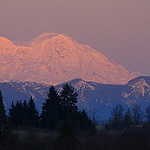

In [25]:
#Displaying image using PILLOW method
PIL.Image.open(str(mountains[6]))  #Displays the 6th image of the mountain image folder (reads the image)

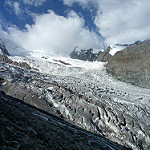

In [26]:
image1=PIL.Image.open(r"C:\Users\ISHITAA\Dataset\seg_train\seg_train\glacier\10003.jpg")  #Displays the image provided by the path
image1

In [27]:
print(type(image1))  #Type of the image
image1.size  #size of the image

<class 'PIL.JpegImagePlugin.JpegImageFile'>


(150, 150)

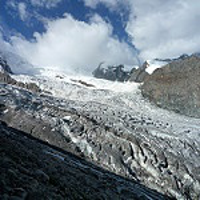

In [28]:
new_img1=image1.resize((200,200))  #Resizing and displaying the image
new_img1

In [29]:
rgb_pixels=np.array(image1)  #Displays the image data in an ndarray
rgb_pixels

array([[[ 45,  83, 132],
        [ 38,  75, 130],
        [ 40,  76, 138],
        ...,
        [174, 191, 207],
        [175, 192, 208],
        [175, 192, 208]],

       [[ 37,  75, 124],
        [ 38,  75, 130],
        [ 35,  71, 133],
        ...,
        [174, 193, 208],
        [175, 194, 209],
        [176, 195, 210]],

       [[ 39,  76, 128],
        [ 46,  82, 140],
        [ 36,  74, 136],
        ...,
        [174, 196, 210],
        [175, 197, 211],
        [175, 197, 211]],

       ...,

       [[ 20,  27,  33],
        [ 16,  25,  30],
        [  6,  17,  21],
        ...,
        [ 86,  94,  83],
        [  5,  12,   5],
        [ 70,  78,  80]],

       [[  0,   5,  13],
        [  6,  15,  22],
        [  3,  14,  18],
        ...,
        [ 85,  93,  82],
        [ 62,  69,  62],
        [ 94,  99, 102]],

       [[  0,   7,  15],
        [  9,  18,  25],
        [ 17,  28,  32],
        ...,
        [ 96, 104,  91],
        [ 50,  57,  50],
        [118, 123, 127]]

In [30]:
print(type(rgb_pixels))
print(rgb_pixels.shape)  #Displays that it has 3 channels - red, blue, green

<class 'numpy.ndarray'>
(150, 150, 3)


In [31]:
#Reading image into the system using OpenCV method
image2=cv2.imread(r'C:\Users\ISHITAA\Dataset\seg_train\seg_train\glacier\10003.jpg',1)   #Reads the image data in an ndarray in float32 dtype
image2

array([[[132,  83,  45],
        [130,  75,  38],
        [138,  76,  40],
        ...,
        [207, 191, 174],
        [208, 192, 175],
        [208, 192, 175]],

       [[124,  75,  37],
        [130,  75,  38],
        [133,  71,  35],
        ...,
        [208, 193, 174],
        [209, 194, 175],
        [210, 195, 176]],

       [[128,  76,  39],
        [140,  82,  46],
        [136,  74,  36],
        ...,
        [210, 196, 174],
        [211, 197, 175],
        [211, 197, 175]],

       ...,

       [[ 33,  27,  20],
        [ 30,  25,  16],
        [ 21,  17,   6],
        ...,
        [ 83,  94,  86],
        [  5,  12,   5],
        [ 80,  78,  70]],

       [[ 13,   5,   0],
        [ 22,  15,   6],
        [ 18,  14,   3],
        ...,
        [ 82,  93,  85],
        [ 62,  69,  62],
        [102,  99,  94]],

       [[ 15,   7,   0],
        [ 25,  18,   9],
        [ 32,  28,  17],
        ...,
        [ 91, 104,  96],
        [ 50,  57,  50],
        [127, 123, 118]]

In [32]:
nature_images_dict= {
    'buildings' : list(data_dir.glob('buildings/*')),
    'forest' : list(data_dir.glob('forest/*')),
    'glacier' : list(data_dir.glob('glacier/*')),
    'mountain' : list(data_dir.glob('mountain/*')),
    'sea' : list(data_dir.glob('sea/*')),
    'street' : list(data_dir.glob('street/*'))
}

nature_images_dict['sea']  #Gives the value of the given key i.e the filepaths of all the images in the sea folder

[WindowsPath('C:/Users/ISHITAA/Dataset/seg_train/seg_train/sea/1.jpg'),
 WindowsPath('C:/Users/ISHITAA/Dataset/seg_train/seg_train/sea/10016.jpg'),
 WindowsPath('C:/Users/ISHITAA/Dataset/seg_train/seg_train/sea/10041.jpg'),
 WindowsPath('C:/Users/ISHITAA/Dataset/seg_train/seg_train/sea/10053.jpg'),
 WindowsPath('C:/Users/ISHITAA/Dataset/seg_train/seg_train/sea/10061.jpg'),
 WindowsPath('C:/Users/ISHITAA/Dataset/seg_train/seg_train/sea/10068.jpg'),
 WindowsPath('C:/Users/ISHITAA/Dataset/seg_train/seg_train/sea/10071.jpg'),
 WindowsPath('C:/Users/ISHITAA/Dataset/seg_train/seg_train/sea/10080.jpg'),
 WindowsPath('C:/Users/ISHITAA/Dataset/seg_train/seg_train/sea/10087.jpg'),
 WindowsPath('C:/Users/ISHITAA/Dataset/seg_train/seg_train/sea/10093.jpg'),
 WindowsPath('C:/Users/ISHITAA/Dataset/seg_train/seg_train/sea/10095.jpg'),
 WindowsPath('C:/Users/ISHITAA/Dataset/seg_train/seg_train/sea/10108.jpg'),
 WindowsPath('C:/Users/ISHITAA/Dataset/seg_train/seg_train/sea/10114.jpg'),
 WindowsPath('C:

In [33]:
nature_labels_dict= {
    'buildings' : 0,
    'forest' : 1,
    'glacier' : 2,
    'mountain' : 3,
    'sea' : 4,
    'street' : 5
}

nature_labels_dict['sea'] #Gives the value of the given key

4

In [34]:
nature_images_dict['sea'][7]  #Gives the file path of the 7th image from sea folder

WindowsPath('C:/Users/ISHITAA/Dataset/seg_train/seg_train/sea/10080.jpg')

In [35]:
image3=cv2.imread(str(nature_images_dict['sea'][6]))   #Reads the image data in an ndarray in float32 dtype and not the actual image
image3

array([[[173, 180, 195],
        [173, 180, 195],
        [172, 179, 194],
        ...,
        [160, 173, 187],
        [158, 170, 188],
        [157, 168, 188]],

       [[169, 180, 194],
        [169, 180, 194],
        [169, 180, 194],
        ...,
        [165, 177, 187],
        [164, 176, 188],
        [161, 175, 187]],

       [[164, 180, 197],
        [165, 181, 198],
        [165, 181, 198],
        ...,
        [162, 176, 188],
        [162, 179, 188],
        [162, 179, 188]],

       ...,

       [[133, 115, 116],
        [ 87,  66,  64],
        [ 69,  41,  34],
        ...,
        [ 91,  49,   7],
        [ 97,  55,  13],
        [ 77,  35,   0]],

       [[ 52,  32,  31],
        [ 27,   4,   0],
        [ 91,  62,  47],
        ...,
        [101,  57,  20],
        [ 88,  44,   7],
        [ 91,  49,  12]],

       [[ 38,  18,  17],
        [ 54,  29,  19],
        [109,  78,  57],
        ...,
        [108,  64,  33],
        [ 86,  42,  11],
        [ 79,  35,   4]]

In [36]:
print(type(image3))
image3.shape   #dimension of the numpy array

<class 'numpy.ndarray'>


(150, 150, 3)

In [37]:
cv2.resize(image3, (180,180)).shape #Resizes the image to 180*180 pixel with 3 channels(rgb)

(180, 180, 3)

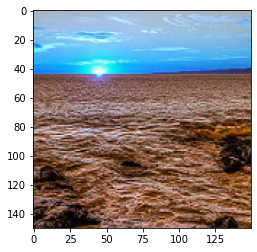

In [38]:
plt.imshow(image3) #Using matplotlib library we can display the image taken in the OpenCV method 

In [39]:
gray=cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
gray.shape #Since it is not a np array it does not provide the number of channels 

(150, 150)

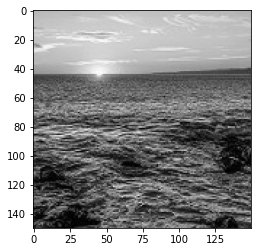

In [40]:
plt.imshow(gray, cmap='gray')

(<AxesSubplot:title={'center':'PNG loaded with PILLOW'}>,
 (-0.5, 149.5, 149.5, -0.5),
 Text(0.5, 1.0, 'PNG loaded with PILLOW'))

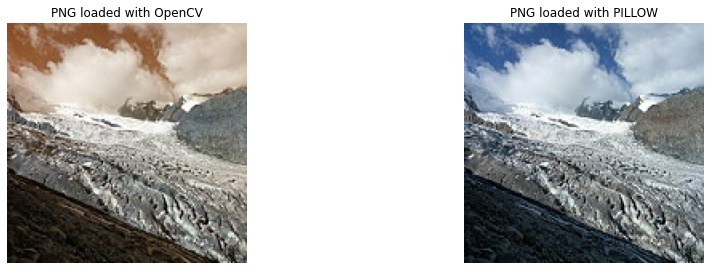

In [41]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1),plt.imshow(image2), plt.axis('off'), plt.title('PNG loaded with OpenCV')   #Follows BGR ordering
plt.subplot(3,2,2),plt.imshow(image1), plt.axis('off'), plt.title('PNG loaded with PILLOW')   #Follows RGB ordering

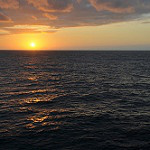

In [42]:
image4=load_img(r'C:\Users\ISHITAA\Dataset\seg_pred\seg_pred\10038.jpg')
image4

In [43]:
image4.getpixel

<bound method Image.getpixel of <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x150 at 0x1CFE70AB880>>

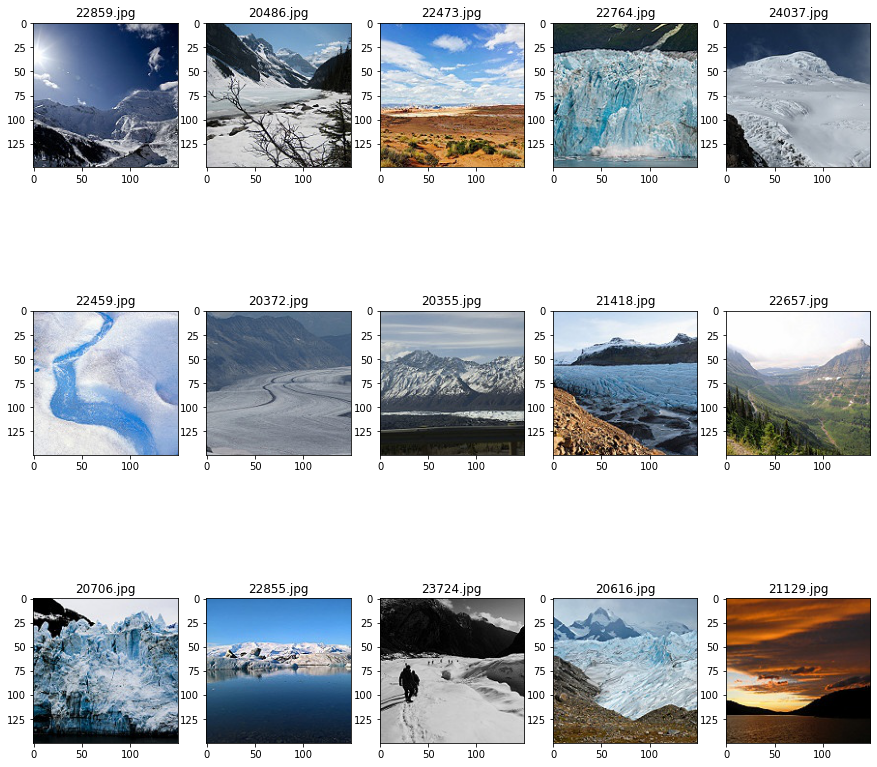

In [44]:
#Visualizing random 15 images without labels
plt.figure(figsize=(15,15))
import random

img_folder=r'C:\Users\ISHITAA\Dataset\seg_test\seg_test\glacier'
for i in range(15):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(3,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)
    plt.axis='off'

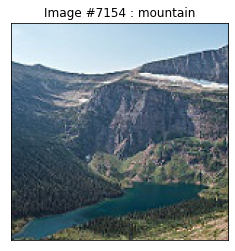

In [45]:
#Visualizing a random image with the image index and label
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

display_random_image(class_names, train_images, train_labels)

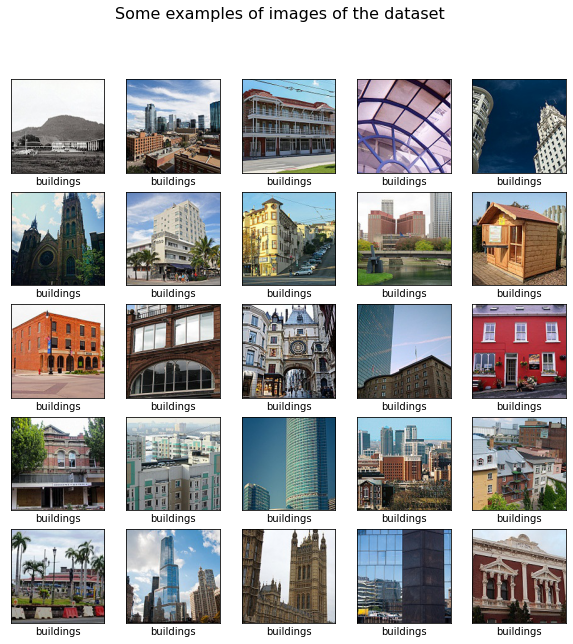

In [46]:
#Visualizing random 25 images with labels
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

display_examples(class_names, train_images, train_labels)

# **Data Pre-processing**

Reading the images:

•Decoding the jpg content to RGB grids of pixels

•Converting these into floating point tensors

•Rescaling the pixel values (between 0 to 255) to the [0,1] interval


**Data Augmentation**

We augment or generate data to include more number of images for training that is to significantly increase the diversity of the data available for training the models, without actually collecting the new data. 

Data Augmentation here is done using the ImageDataGenerator from Keras which includes operations on training images such as rotation, flipping, horizontal/vertical shifting, shearing, rescaling or perform similar operations on each of the images in the dataset. 

We are rescaling by 1.0/255 to normalize the rgb values if they are in range 0-255 the values are too high for good model performance. 

ImageDataGenerator is used to expand the dataset in order to improve the performance and ability of the model to generalize.

In [47]:
#Generating batches of tensor image data

#Augmentation configuration to be used for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255,   #rescaling factor
    rotation_range=40,   #Degree range for random rotations of the images
    width_shift_range=0.2,  #Specifies the upper bound by which the image is to be randomly shifted(left/right) May be int or float ranging from -1 to 1 or-1.0 to 1.0
    height_shift_range=0.2, #Specifies the upper bound by which the image is to be randomly shifted(up/down) May be int or float ranging from -1 to 1 or-1.0 to 1.0
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,  #Flips the image horizontally
    vertical_flip=False,   #Here it Doesn't flip the image vertically
    validation_split=0.3,
    fill_mode='nearest'
)

In [48]:
train_generator = train_datagen.flow_from_directory(train_data_dir,  #Identifies classes automatically from the folder name
                                            target_size=(img_height,img_width),
                                            batch_size=batch_size,
                                            classes=['buildings','forest','glacier','mountain','sea','street'],
                                            #color_mode='grayscale',
                                            color_mode='rgb',
                                            class_mode='categorical',
                                            shuffle='False',
                                            subset='training')    #Setting as training data
images_train, labels_train = next(train_generator)

print(images_train.shape)  #A tensor with a batch of 32 images of shape 200x200x3 and the last dimension referring to the colour channels RGB
print(labels_train.shape)  #A tensor with 6 labels corresponding to 32 images

Found 9826 images belonging to 6 classes.
(32, 150, 150, 3)
(32, 6)


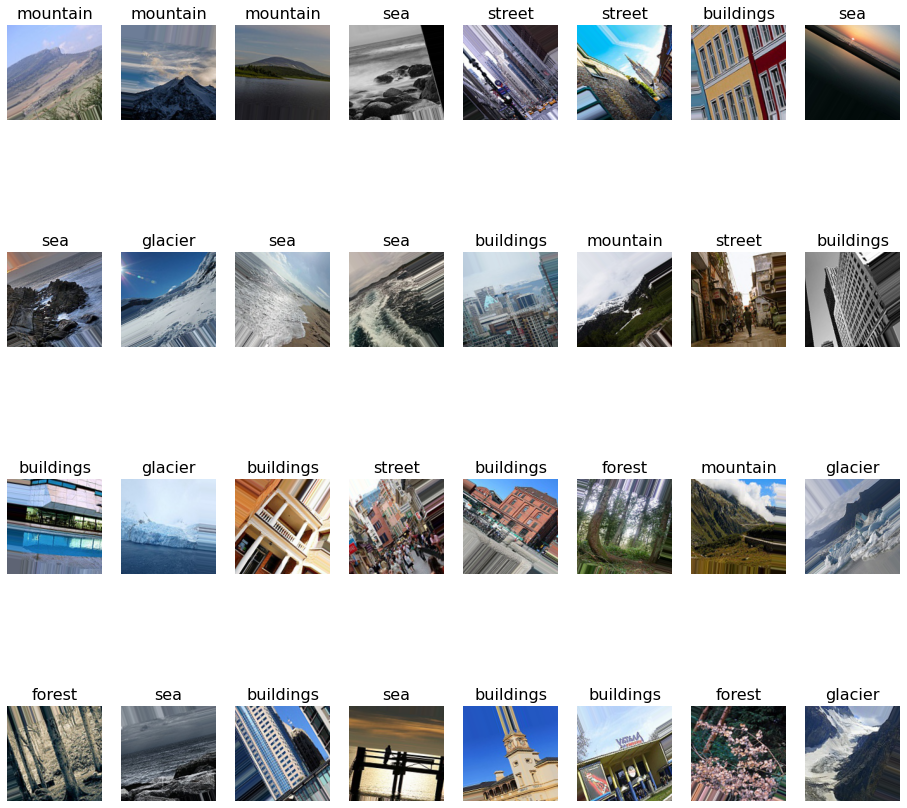

In [49]:
#Displaying a batch of augmented training images
def plot(imgs, figsize=(16,16), rows=4, titles=None):
    fig=plt.figure(figsize=figsize)
    columns= len(imgs)//rows if len(imgs) % 2==0 else len(imgs)//rows +1
    for i in range(len(imgs)):
        pics=fig.add_subplot(rows, columns, i+1)
        pics.axis('off')
        pics.set_title(class_names[titles[i].tolist().index(1)], fontsize=16)
        plt.imshow(imgs[i])
        
plot(images_train, titles=labels_train)   

In [50]:
#Augmentation configuration to be used for testing
val_datagen = ImageDataGenerator(
    rescale=1.0/255,   #rescaling factor to standardize the image values in the range[0,1]
    rotation_range=40,   #Degree range for random rotations of the images
    width_shift_range=0.2,  #Specifies the upper bound by which the image is to be randomly shifted(left/right) May be int or float ranging from -1 to 1 or-1.0 to 1.0
    height_shift_range=0.2, #Specifies the upper bound by which the image is to be randomly shifted(up/down) May be int or float ranging from -1 to 1 or-1.0 to 1.0
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,  #Flips the image horizontally
    vertical_flip=False,   #Here it Doesn't flip the image vertically
    validation_split=0.3,
    fill_mode='nearest'
)

In [51]:
val_generator = val_datagen.flow_from_directory(val_data_dir,  #Identifies classes automatically from the folder name
                                            target_size=(img_height,img_width),
                                            batch_size=batch_size,
                                            classes=['buildings','forest','glacier','mountain','sea','street'],
                                            #color_mode='grayscale',
                                            color_mode='rgb',
                                            class_mode='categorical',
                                            subset='validation')   #Setting as validation data
images_val, labels_val = next(val_generator)

print(images_val.shape)
print(labels_val.shape)


Found 898 images belonging to 6 classes.
(32, 150, 150, 3)
(32, 6)


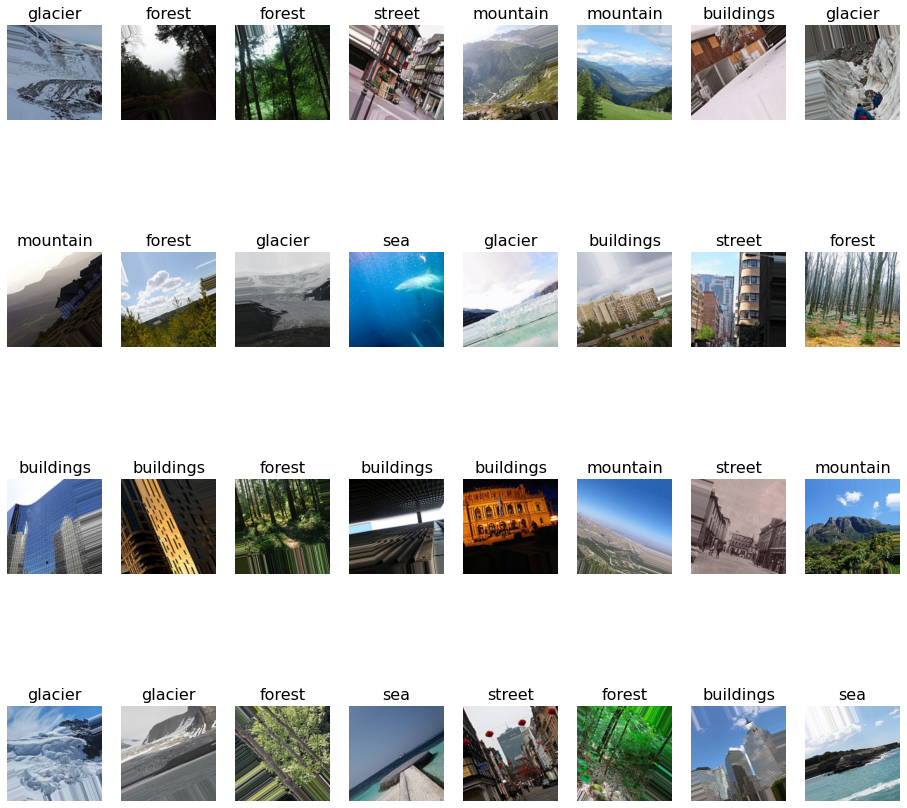

In [52]:
#Displaying a batch of augmented validation images
def plot(imgs, figsize=(16,16), rows=4, titles=None):
    fig=plt.figure(figsize=figsize)
    columns= len(imgs)//rows if len(imgs) % 2==0 else len(imgs)//rows +1
    for i in range(len(imgs)):
        pics=fig.add_subplot(rows, columns, i+1)
        pics.axis('off')
        pics.set_title(class_names[titles[i].tolist().index(1)], fontsize=16)
        plt.imshow(imgs[i])
        
plot(images_val, titles=labels_val)    

In [53]:
#Storing the augmentated images into a folder
image5=load_img(r'C:\Users\ISHITAA\Dataset\seg_train\seg_train\sea\386.jpg')  #This is a PIL image
x=img_to_array(image5)  #A numpy array with shape(150, 150, 3)
x=x.reshape((1,)+x.shape) #A numpy array with shape(1, 150, 150, 3)

#The .flow() command below generates batches of randomly transformed images and saves the results to the preview directory(21 images)
i=0
for batch in train_datagen.flow(x, batch_size=1, save_to_dir=r'C:\Users\ISHITAA\Dataset\Augmented_Images_Preview', save_prefix='sea', save_format='jpg'):
  i+=1
  if i>30:
    break

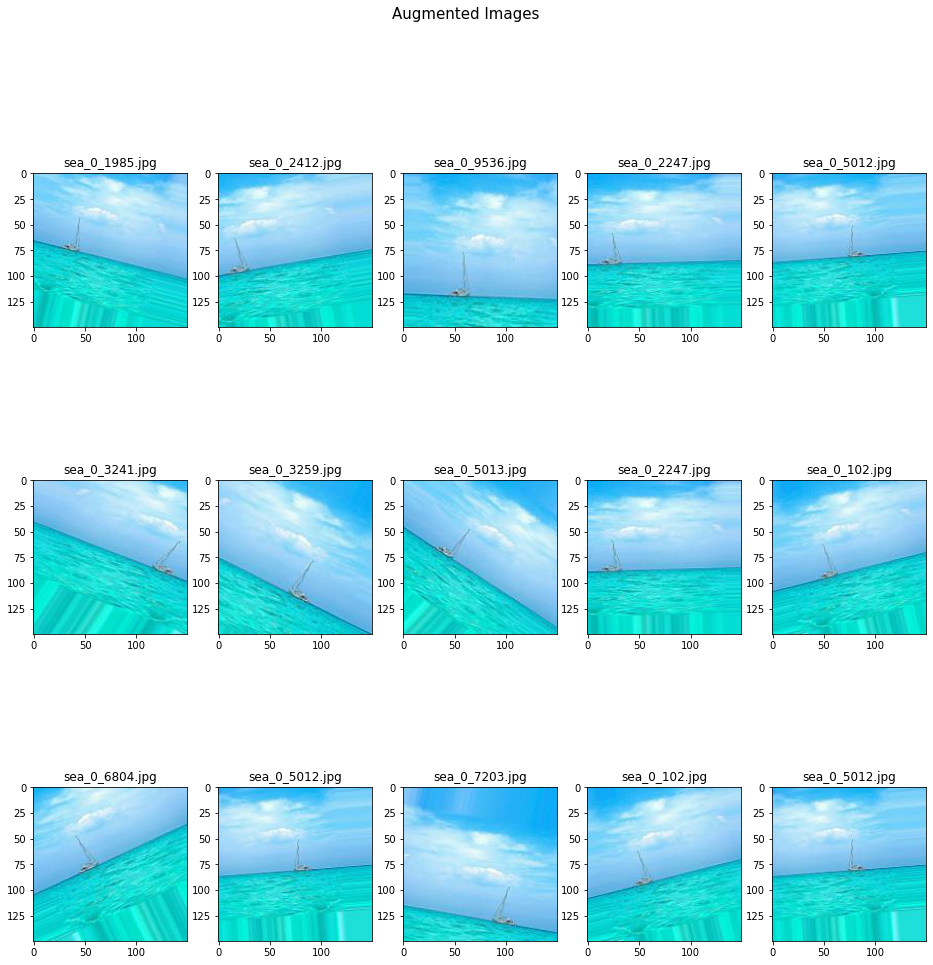

In [54]:
#Visualizing random 15 augmented images 
figure=plt.figure(figsize=(16,16))
figure.suptitle("Augmented Images", fontsize=15)
import random

aug_img_folder=r'C:\Users\ISHITAA\Dataset\Augmented_Images_Preview'
for i in range(15):
    file = random.choice(os.listdir(aug_img_folder))
    image_path= os.path.join(aug_img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(3,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)
    plt.axis='off'

In [55]:
# The labels are stored in class_indices in dictionary form. 
# Checking the labels
train_generator.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [56]:
class_names=train_generator.class_indices.keys()
class_names

dict_keys(['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'])

In [57]:
len(class_names)

6

In [58]:
train_generator.classes

array([0, 0, 0, ..., 5, 5, 5])

# **Buiding and training the model from scratch**

In [59]:
#CNN model Architecture:

#Initializing the CNN model(creating)
model = Sequential()

#Adding the layers to the model 
#First convolutional layer 
model.add(Conv2D(32, kernel_size=(5, 5), activation="relu", input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Second convolutional layer
model.add(Conv2D(64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Third convolutional layer
#model.add(Conv2D(128, kernel_size=(3, 3), activation="relu"))
#model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

#model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#Flattening & Dropout layer
model.add(Flatten())
model.add(Dropout(rate=0.5))

#Fully connected layer
model.add(Dense(128, activation="relu"))

#Output layer
model.add(Dense(6, activation="softmax"))

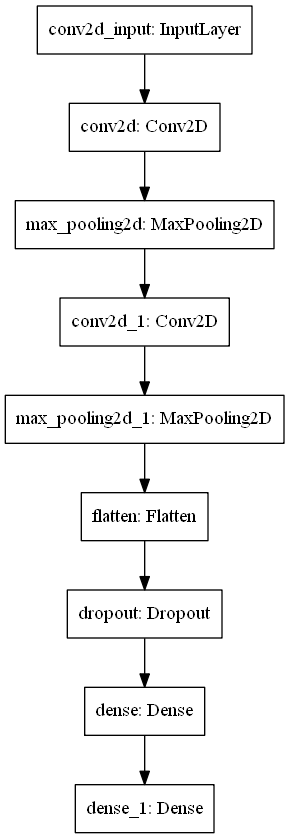

In [60]:
#Plotting a graphical representation of the model
import pydotplus
from keras.utils.vis_utils import model_to_dot
keras.utils.plot_model(model)

In [61]:
#Compliling the model using accuracy to measure the model performance
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

#Summarizing the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 146, 146, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 69, 69, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 73984)             0         
_________________________________________________________________
dropout (Dropout)            (None, 73984)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               9

In [62]:
len(train_generator)

308

In [61]:
#Training (fitting) the model
history=model.fit(train_generator, 
                  epochs=30, 
                  verbose=1, 
                  steps_per_epoch=307,  # data_size//batch_size = 9826//32
                  validation_data=val_generator,
                  validation_steps=28) # data_size//batch_size = 898//32   
history

Epoch 1/30
307/307 [==============================] - 306s 998ms/step - loss: 1.3208 - accuracy: 0.4791 - val_loss: 1.1658 - val_accuracy: 0.5335
Epoch 2/30
307/307 [==============================] - 285s 929ms/step - loss: 1.0649 - accuracy: 0.5806 - val_loss: 1.0449 - val_accuracy: 0.5960
Epoch 3/30
307/307 [==============================] - 256s 832ms/step - loss: 1.0022 - accuracy: 0.6170 - val_loss: 0.9320 - val_accuracy: 0.6551
Epoch 4/30
307/307 [==============================] - 253s 825ms/step - loss: 0.9587 - accuracy: 0.6351 - val_loss: 0.9062 - val_accuracy: 0.6685
Epoch 5/30
307/307 [==============================] - 253s 824ms/step - loss: 0.9054 - accuracy: 0.6589 - val_loss: 0.9243 - val_accuracy: 0.6574
Epoch 6/30
307/307 [==============================] - 252s 822ms/step - loss: 0.8835 - accuracy: 0.6604 - val_loss: 0.8823 - val_accuracy: 0.6920
Epoch 7/30
307/307 [==============================] - 252s 822ms/step - loss: 0.8687 - accuracy: 0.6732 - val_loss: 0.8308 -

In [63]:
#Saving the model
model.save('image_classification_model.h5')

**After Training:**

Training Accuracy: 75.24%

Validation Accuracy: 71.65%

Training Loss: 68.52%

Validation Loss: 70.13%

In [99]:
#Listing all the data in history
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

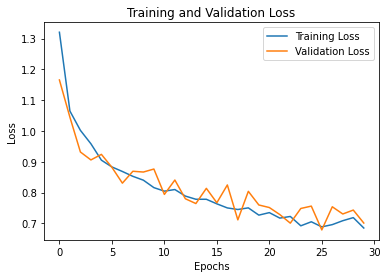

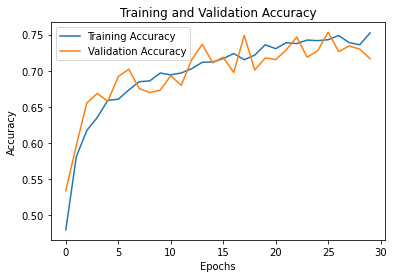

In [71]:
#Plotting training and validation accuracy & loss curves

epochs = range(len(history.history['loss']))

loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

#Plotting losses

plt.plot(epochs, loss, label='Training Loss')  #,'ro'
plt.plot(epochs, val_loss, label='Validation Loss') #, 'r'
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#Plotting accuracy

plt.figure()
plt.plot(epochs, accuracy, label='Training Accuracy')  #,'bo'
plt.plot(epochs, val_accuracy, label='Validation Accuracy')   #, 'b'
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();
    

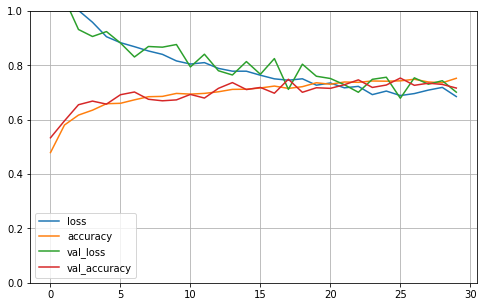

In [77]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [64]:
#Loading the saved model
model=load_model('image_classification_model.h5', compile = True)

Since I had given the model both a training and a validation set to learn from: the training set would be used to fit the model, and the validation set could be used e.g. to evaluate the model on unseen data after each epoch and stop fitting if the validation loss ceases to decrease.

In [183]:
#Evaluating the model's performance....train_generator was used to train the model and val_generator to estimate its performance
train_loss, train_accuracy=model.evaluate(train_generator, steps=50)   #Will return a list of two values...1)loss of model 2) accuracy of model....Since we don't want loss but only want accuracy, we ignore the loss value
val_loss, val_accuracy=model.evaluate(val_generator, steps=50)
print('Accuracy of the model on the train set is: %.2f' % (train_accuracy*100))
print('Accuracy of the model on the test set is: %.2f' % (val_accuracy*100))

29/29 [==============================] - 6s 218ms/step - loss: 0.6767 - accuracy: 0.7428
Accuracy of the model on the train set is: 75.39
Accuracy of the model on the test set is: 74.28


As these two accuracies are
merely close to each other we conclude that our network was
not overfitting on the data thus our network was performed very
well on the dataset.

In [65]:
#Shape of the second layer(maxpooling)
model.layers[2].input_shape

(None, 73, 73, 32)

In [66]:
#Loading the weights of the saved model
model.load_weights('image_classification_model.h5')

32
[0. 0. 0. 0. 0. 1.]


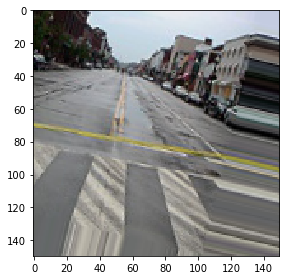

[0. 0. 0. 1. 0. 0.]


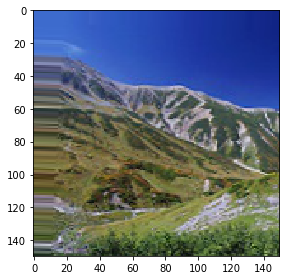

[0. 0. 1. 0. 0. 0.]


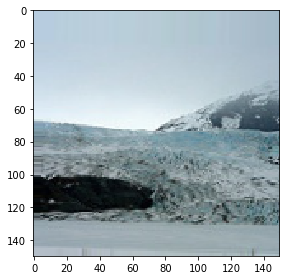

[0. 0. 1. 0. 0. 0.]


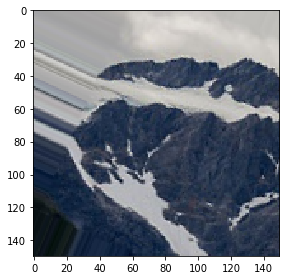

[0. 0. 1. 0. 0. 0.]


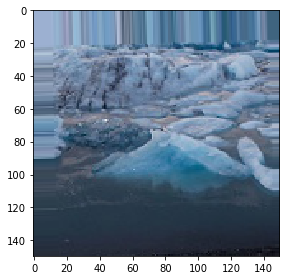

[1. 0. 0. 0. 0. 0.]


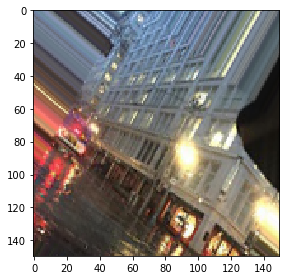

[0. 0. 0. 0. 1. 0.]


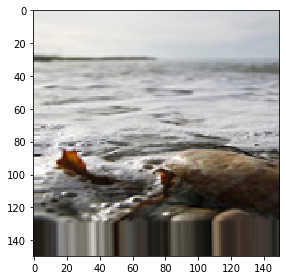

[0. 0. 0. 0. 1. 0.]


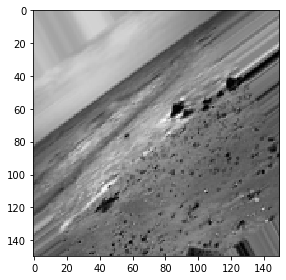

[1. 0. 0. 0. 0. 0.]


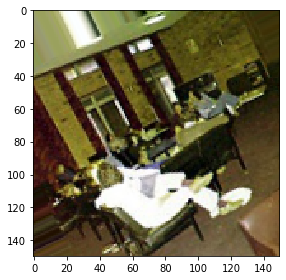

[0. 0. 0. 0. 1. 0.]


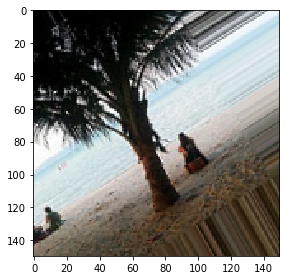

[1. 0. 0. 0. 0. 0.]


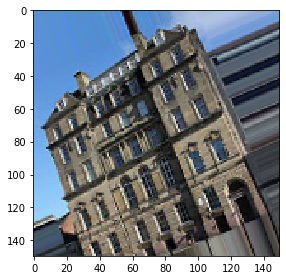

[0. 0. 0. 0. 1. 0.]


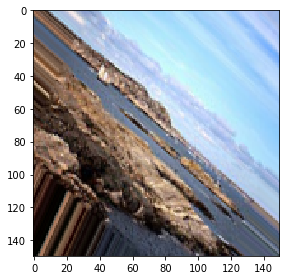

[0. 0. 1. 0. 0. 0.]


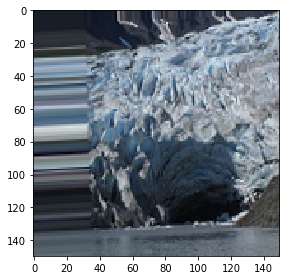

[0. 0. 1. 0. 0. 0.]


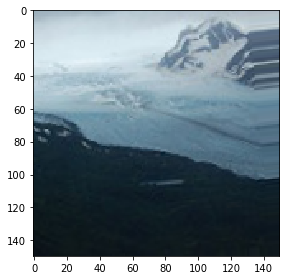

[0. 0. 0. 0. 0. 1.]


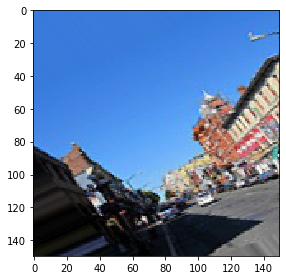

[1. 0. 0. 0. 0. 0.]


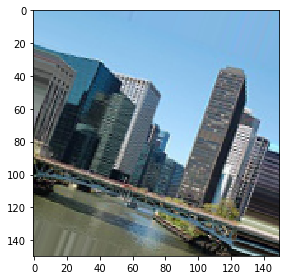

[1. 0. 0. 0. 0. 0.]


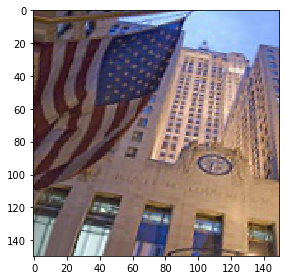

[0. 1. 0. 0. 0. 0.]


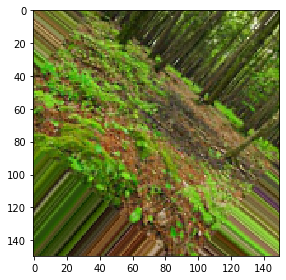

[0. 0. 0. 0. 0. 1.]


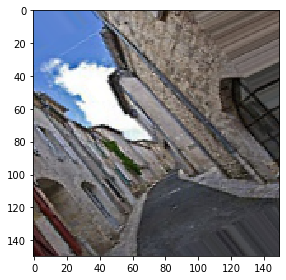

[0. 0. 1. 0. 0. 0.]


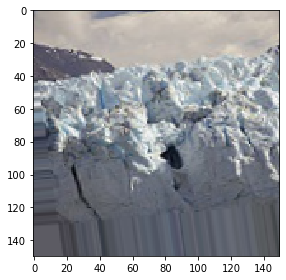

[0. 1. 0. 0. 0. 0.]


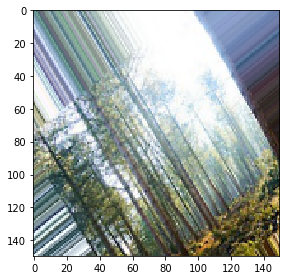

[0. 0. 1. 0. 0. 0.]


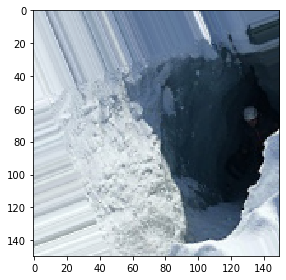

[0. 0. 1. 0. 0. 0.]


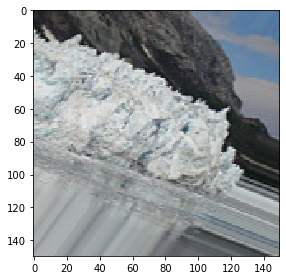

[0. 1. 0. 0. 0. 0.]


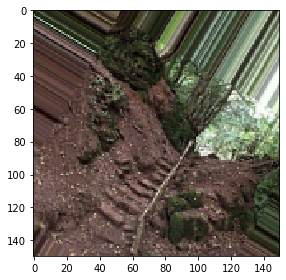

[0. 0. 0. 1. 0. 0.]


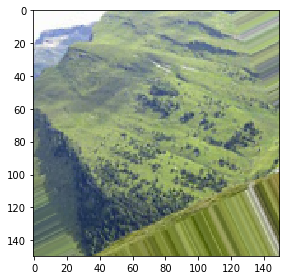

[0. 0. 1. 0. 0. 0.]


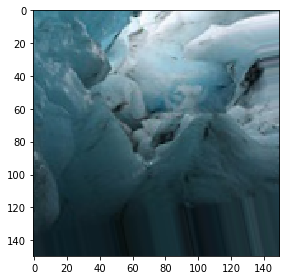

[0. 0. 1. 0. 0. 0.]


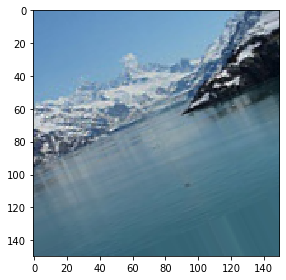

[0. 0. 0. 0. 0. 1.]


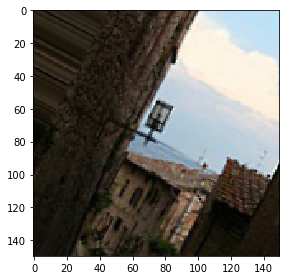

[0. 1. 0. 0. 0. 0.]


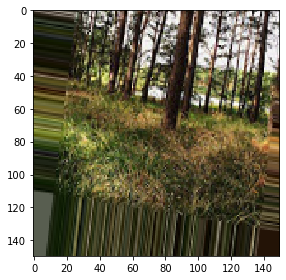

[0. 0. 1. 0. 0. 0.]


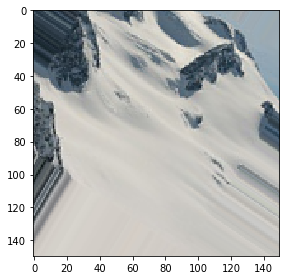

[0. 0. 0. 0. 1. 0.]


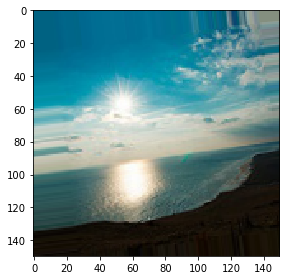

[0. 0. 1. 0. 0. 0.]


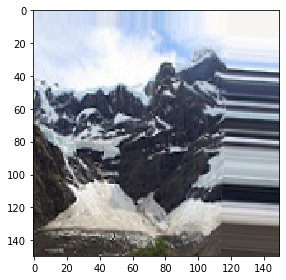

In [67]:
#Generating a batch of random images with their respective labels in the form of list
from skimage import io
def imshow(image_RGB):
    io.imshow(image_RGB)
    io.show()
    
img_batch, label_batch=val_generator.next()
print(len(img_batch))
for i in range(0,len(img_batch)):
    image=img_batch[i]
    print(label_batch[i])
    imshow(image)

In [68]:
labels_val=labels_val[:]
labels_val

array([[0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [1.

The prediction for the selected image is: 
 [[0. 1. 0. 0. 0. 0.]]
The predicted image is of a Forest!


Text(0.5, 0.98, 'The Image is shown below:')

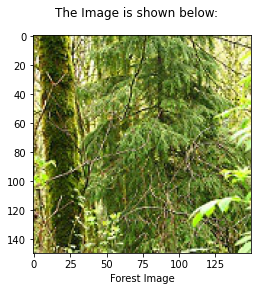

In [71]:
#Predicting a single image with its respective label

test_img=plt.imread(r"C:\Users\ISHITAA\Dataset\seg_pred\seg_pred\374.jpg")

img_pred=image.load_img(r'C:\Users\ISHITAA\Dataset\seg_pred\seg_pred\374.jpg', target_size=(img_height,img_width))
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)  #Creating batch axis  #creating a batch of one image

result=model.predict(img_pred)
print('The prediction for the selected image is: '+'\n', result)
if result[0][0]==1:
    print('The predicted image is of a Building!')
elif result[0][1]==1:
    print('The predicted image is of a Forest!')
elif result[0][2]==1:
    print('The predicted image is of a Glacier!')
elif result[0][3]==1:
    print('The predicted image is of a Mountain!')
elif result[0][4]==1:
    print('The predicted image is of a Sea!')
elif result[0][5]==1:
    print('The predicted image is of a Street!')
else:
    print("Error!")

#print('\n'+'The image is shown below:')
img=plt.imshow(test_img)

from IPython.display import display
display(img)
plt.xlabel("Forest Image")
plt.suptitle("The Image is shown below:")

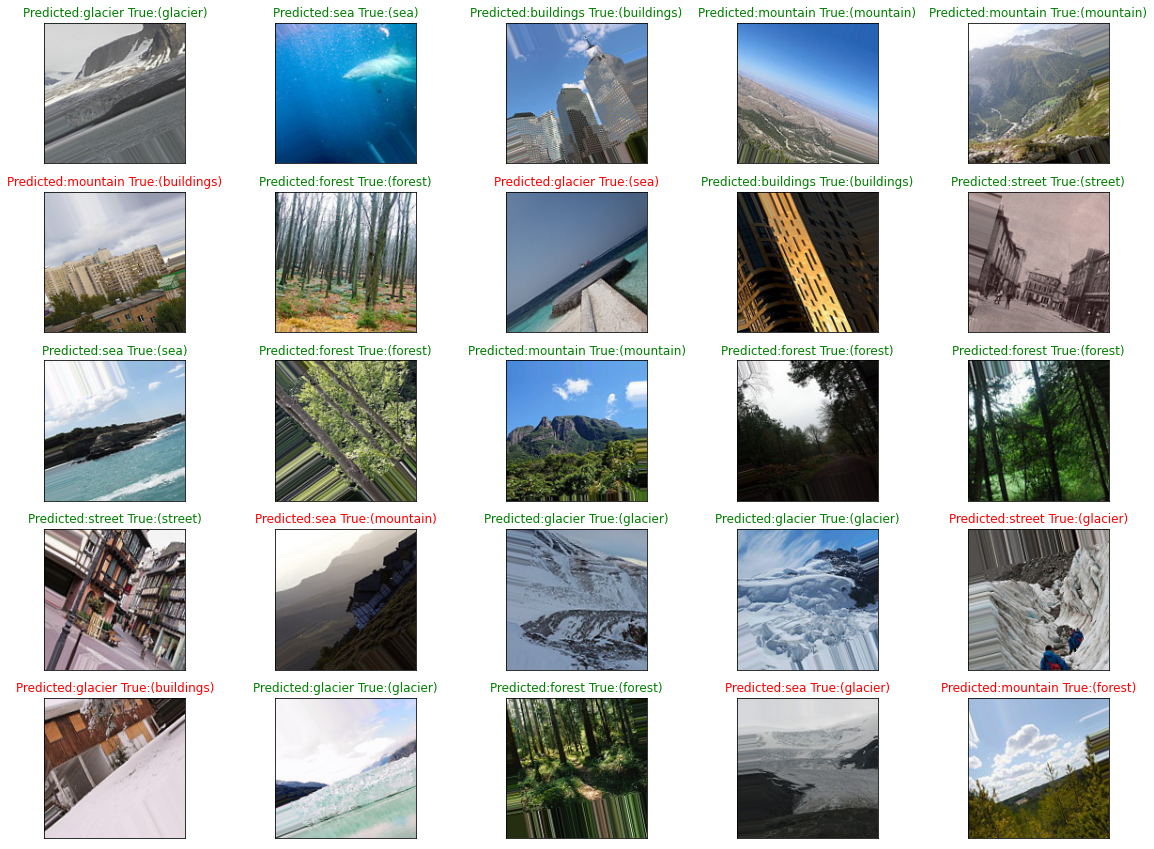

In [74]:
# Using model to predict on test data
Y_pred = model.predict(images_val)

# Plotting the predictions of different natural scenes and checking their original labels

labels=list(class_names_label.keys())
fig = plt.figure(figsize=(20, 15))
for i, idx in enumerate(np.random.choice(images_val.shape[0], size=25, replace=False)):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images_val[idx]))
    pred_idx = np.argmax(Y_pred[idx])
    true_idx = np.argmax(labels_val[idx])
    ax.set_title("Predicted:{} True:({})".format(labels[pred_idx], labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

Each image has its predicted class label as a title, and its true class label is formatted in parentheses

In [75]:
y_pred=model.predict(val_generator, steps=1, verbose=0)  # Vector of probabilities
print(y_pred)

[[4.61132787e-02 1.43202220e-03 5.80011606e-01 1.19051047e-01
  2.45408162e-01 7.98383448e-03]
 [1.80707276e-01 1.85313210e-01 6.72180206e-02 1.07294686e-01
  4.39808406e-02 4.15486038e-01]
 [4.05291765e-04 9.96612251e-01 2.83325487e-03 4.57678580e-05
  1.98859143e-05 8.36819599e-05]
 [1.49595812e-01 2.32712422e-02 1.22946585e-04 5.26665353e-05
  1.53426081e-04 8.26803923e-01]
 [1.45366229e-02 2.34504454e-02 1.79183617e-01 7.01303005e-01
  8.02863166e-02 1.23999710e-03]
 [3.01729247e-04 3.66522232e-03 9.39207822e-02 9.01470542e-01
  6.40287413e-04 1.44118178e-06]
 [2.93961931e-02 4.17170003e-02 2.47149616e-01 6.26239032e-02
  8.70253053e-03 6.10410810e-01]
 [1.70703068e-01 7.73566067e-02 3.34611446e-01 1.73315890e-02
  8.80716220e-02 3.11925620e-01]
 [4.02024500e-02 4.45115892e-03 3.55841853e-02 8.45921040e-01
  7.24576190e-02 1.38353545e-03]
 [4.79236245e-02 9.74115282e-02 4.97424044e-02 7.64611185e-01
  3.03520635e-02 9.95915104e-03]
 [1.78299174e-02 9.17575415e-03 2.74403095e-01 8.7

In [76]:
#Rounding predictions
rounded=[round(x[0]) for x in y_pred]
print(rounded)

predicted_classes = np.argmax(np.round(y_pred),axis=1)
predicted_classes

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


array([2, 0, 1, 5, 3, 3, 5, 0, 3, 3, 4, 4, 2, 0, 0, 1, 0, 0, 1, 5, 5, 3,
       0, 3, 2, 2, 1, 2, 5, 1, 0, 4], dtype=int64)

In [77]:
predicted_classes.shape, 

((32,),)

In [78]:
num_of_train_samples = 9826
num_of_test_samples = 898

#Confusion Matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(val_generator, num_of_test_samples // 32 +1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print('\n')
print(confusion_matrix(val_generator.classes, y_pred))
print('\n')
print('Classification Report')
print('\n')
target_names = [ 'buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
print(classification_report(val_generator.classes, y_pred, target_names=target_names))

Confusion Matrix


[[24 20 26 16 21 24]
 [24 28 19 22 19 30]
 [21 31 37 22 22 32]
 [26 29 33 27 23 19]
 [29 22 25 28 26 23]
 [21 26 27 27 22 27]]


Classification Report


              precision    recall  f1-score   support

   buildings       0.17      0.18      0.17       131
      forest       0.18      0.20      0.19       142
     glacier       0.22      0.22      0.22       165
    mountain       0.19      0.17      0.18       157
         sea       0.20      0.17      0.18       153
      street       0.17      0.18      0.18       150

    accuracy                           0.19       898
   macro avg       0.19      0.19      0.19       898
weighted avg       0.19      0.19      0.19       898



In [80]:
predicted_classes = model.predict_classes(val_generator)

class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())
true_classes = val_generator.classes

from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def display_results(y_true, y_preds, class_labels):
    
    results = pd.DataFrame(precision_recall_fscore_support(y_true, y_preds),
                          columns=class_labels).T

    results.rename(columns={0: 'Precision', 1: 'Recall',
                            2: 'F-Score', 3: 'Support'}, inplace=True)
    
    results.sort_values(by='F-Score', ascending=True, inplace=True)                           
    global_acc = accuracy_score(y_true, y_preds)
    
    print("Overall Categorical Accuracy: {:.2f}%".format(global_acc*100))
    return results

display_results(true_classes, predicted_classes, class_indices.values())

Overall Categorical Accuracy: 16.26%


Precision    Recall   F-Score  Support
mountain    0.150000  0.133758  0.141414    157.0
street      0.149660  0.146667  0.148148    150.0
forest      0.142857  0.161972  0.151815    142.0
sea         0.165517  0.156863  0.161074    153.0
glacier     0.169811  0.163636  0.166667    165.0
buildings   0.198630  0.221374  0.209386    131.0

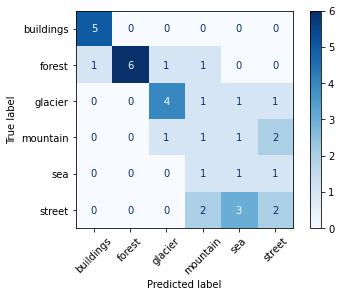

<Figure size 432x288 with 0 Axes>

In [81]:
#Plotting the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

y_pred = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5])
y_test = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 3 , 4 , 5 , 3 , 5, 2, 1,5,5,4,3,5,2,2,3,3,4,5,5])
labels = [ 'buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.show()
plt.tight_layout()
plt.savefig("conf.png", pad_inches=5)

### **<center>For transfer learning Refer to Transfer Learning using VGG16 Model.ipynb</center>**